# Data Preprocessing - Parte 3 (Temporal Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path, sep=',', encoding='utf-8'):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=sep, encoding=encoding)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [3]:
data = load_data("../data/section_3/indicators_afg.csv")
summary = summarize_data(data)

Data loaded successfully.
Data summary:
       Country Name Country ISO3   Year Indicator Name Indicator Code  Value
count         59730        59730  59730          59730          59730  59730
unique            2            2     66           3317           3318  34557
top     Afghanistan          AFG   2007  Net migration    SM.POP.NETM      0
freq          59729        59729   2330            195            195   3358


In [4]:
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [5]:
# dropping the first row
# data = data.drop(index=0)
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [6]:
# Transforming the 'Year' column to numeric type and 'Value' column to float type
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # integer type
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # float type

In [7]:
# Keeping the rows with 'Indicator Name' == 'Military expenditure (% of general government expenditure)'
data_military_expenditure = data[data['Indicator Name'] == 'Military expenditure (% of general government expenditure)']
data_military_expenditure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
45674,Afghanistan,AFG,2021.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,10.502660
45675,Afghanistan,AFG,2020.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.972825
45676,Afghanistan,AFG,2019.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.275736
45677,Afghanistan,AFG,2018.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.724855
45678,Afghanistan,AFG,2017.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.652592


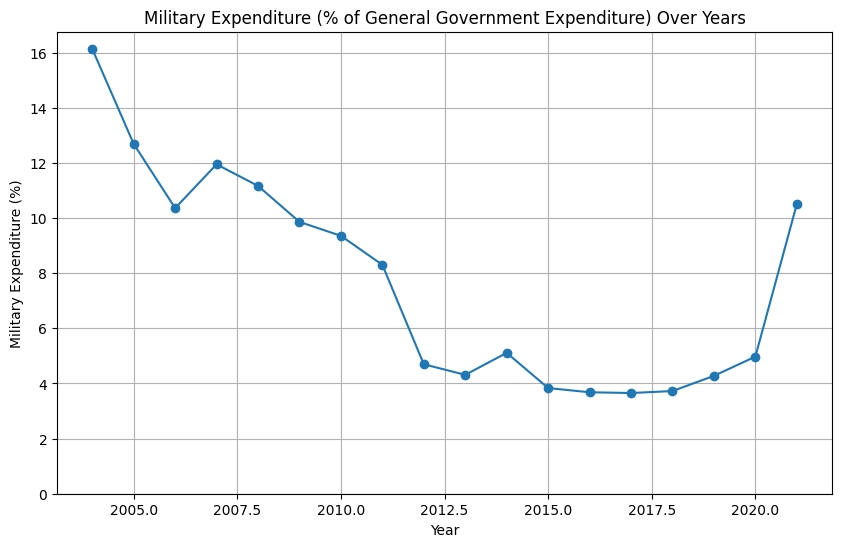

In [8]:
# Plotting line chart for Military Expenditure over the years using the columns 'Year' and 'Value'
# y-axis starting from 0
plt.figure(figsize=(10, 6))
plt.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o')
plt.title('Military Expenditure (% of General Government Expenditure) Over Years')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (%)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

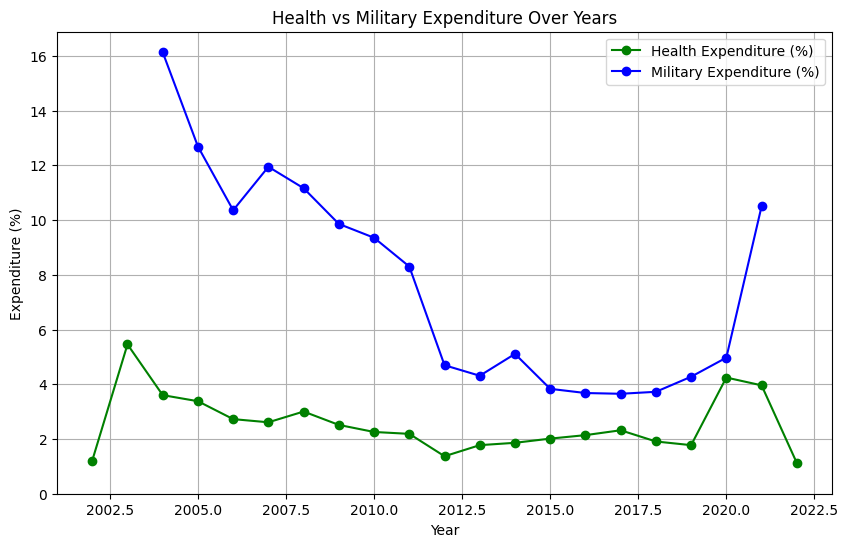

In [9]:
# Plotting two lines: 'Domestic general government health expenditure (% of general government expenditure)' and 'Military expenditure (% of general government expenditure)'
data_health_expenditure = data[data['Indicator Name'] == 'Domestic general government health expenditure (% of general government expenditure)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_health_expenditure['Year'], data_health_expenditure['Value'], marker='o', label='Health Expenditure (%)', color='green')
ax.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o', label='Military Expenditure (%)', color='blue')
ax.set_title('Health vs Military Expenditure Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure (%)')
ax.set_ylim(bottom=0)
ax.grid(True)
ax.legend()
plt.show()

In [10]:
# Printing in a file all the unique values of the column 'Indicator Name'
"""
unique_indicators = data['Indicator Name'].unique()
with open('unique_indicators.txt', 'w') as f:
    for indicator in unique_indicators:
        f.write(f"{indicator}\n")
"""


'\nunique_indicators = data[\'Indicator Name\'].unique()\nwith open(\'unique_indicators.txt\', \'w\') as f:\n    for indicator in unique_indicators:\n        f.write(f"{indicator}\n")\n'

In [11]:
# Selecting only the unique indicators that contain the phrase '(% of GDP)'
"""
gdp_indicators = [indicator for indicator in unique_indicators if '(% of GDP)' in indicator]
print("Indicators related to GDP:")
for indicator in gdp_indicators:
    print(indicator)

my_gdp_indicators = ['Current health expenditure (% of GDP)',
                     'Expense (% of GDP)', 
                     'Government expenditure on education, total (% of GDP)',
                     'Military expenditure (% of GDP)']
"""

'\ngdp_indicators = [indicator for indicator in unique_indicators if \'(% of GDP)\' in indicator]\nprint("Indicators related to GDP:")\nfor indicator in gdp_indicators:\n    print(indicator)\n\nmy_gdp_indicators = [\'Current health expenditure (% of GDP)\',\n                     \'Expense (% of GDP)\', \n                     \'Government expenditure on education, total (% of GDP)\',\n                     \'Military expenditure (% of GDP)\']\n'

In [12]:
# Grouping by year and summing the 'Value' for each year in the gdp_indicators
"""
gdp_data = data[data['Indicator Name'].isin(my_gdp_indicators)]
gdp_summary = gdp_data.groupby('Year')['Value'].sum().reset_index()
print("GDP-related indicators summary by year:")
print(gdp_summary)
"""

'\ngdp_data = data[data[\'Indicator Name\'].isin(my_gdp_indicators)]\ngdp_summary = gdp_data.groupby(\'Year\')[\'Value\'].sum().reset_index()\nprint("GDP-related indicators summary by year:")\nprint(gdp_summary)\n'

In [13]:
#categories = ['Current health expenditure (% of GDP)', 'Domestic general government health expenditure (% of GDP)',]

# Domestic general government health expenditure (% of general government expenditure)

In [14]:
# line plot with all the gdp indicators in my_gdp_indicators
"""
plt.figure(figsize=(12, 8))
for indicator in my_gdp_indicators:
    indicator_data = data[data['Indicator Name'] == indicator]
    plt.plot(indicator_data['Year'], indicator_data['Value'], label=indicator)

plt.xlabel('Year')
plt.ylabel('Value (% of GDP)')
plt.title('GDP-related Indicators Over Time')
plt.legend()
plt.show()
"""

"\nplt.figure(figsize=(12, 8))\nfor indicator in my_gdp_indicators:\n    indicator_data = data[data['Indicator Name'] == indicator]\n    plt.plot(indicator_data['Year'], indicator_data['Value'], label=indicator)\n\nplt.xlabel('Year')\nplt.ylabel('Value (% of GDP)')\nplt.title('GDP-related Indicators Over Time')\nplt.legend()\nplt.show()\n"

In [15]:
# https://blogs.worldbank.org/en/endpovertyinsouthasia/where-does-money-go-examining-public-spending-afghanistan

### Prove con un altro dataset

In [16]:
data = load_data("../data/section_3/afg-boost-eng-2011-19.CSV", sep=';', encoding='ansi')
summary = summarize_data(data)

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_7068\3226375730.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=sep, encoding=encoding)


Data loaded successfully.
Data summary:
                Year
count  829828.000000
mean     1393.812727
std         2.842847
min      1389.000000
25%      1391.000000
50%      1394.000000
75%      1396.000000
max      1398.000000


In [17]:
data.head()

,Year,Budget Classification,Recurrent/Development,Ministry/Agency,Sub-Org,Unit,Project,Province,District,Program,...,Sub-Major Code,Object Code,Fund Type,Fund,Sub Fund,Fund Component,Sector,Budget,Expenditure,Commitment/Obligation
0,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10002 Lotfa,Economic Governance and Private Sector Develop...,-,(24.403.574.911),-
1,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10001 ARTF,Economic Governance and Private Sector Develop...,-,(15.444.749.259),-
2,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10004 Cstc - Mod,Economic Governance and Private Sector Develop...,-,(13.507.149.151),-
3,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2008 Unknown,20080 Customs,999999 Unknown,32 Herat,3201 Provincial Capital Of Herat (Herat),999 Balance Sheet Account,...,120 Customs Duty and taxes imports,12000 Customs duty imports,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10000 Operating Fund,Economic Governance and Private Sector Develop...,-,(7.761.472.226),-
4,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2008 Unknown,20080 Customs,999999 Unknown,06 Nangarhar,0601 Provincial Capital Of Nangarhar ( Jalala...,999 Balance Sheet Account,...,120 Customs Duty and taxes imports,12000 Customs duty imports,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10000 Operating Fund,Economic Governance and Private Sector Develop...,-,(6.099.675.567),-


In [18]:
# Printing the column names and some statistics and their types
    
#print(data.columns)
#print(data.describe())
print(data.dtypes)

Year                        int64
Budget Classification      object
Recurrent/Development      object
Ministry/Agency            object
Sub-Org                    object
Unit                       object
Project                    object
Province                   object
District                   object
Program                    object
Sub-Program                object
Activity                   object
COFOG1                     object
COFOG2                     object
COFOG3                     object
Major Code                 object
Sub-Major Code             object
Object Code                object
Fund Type                  object
Fund                       object
Sub Fund                   object
Fund Component             object
Sector                     object
 Budget                    object
 Expenditure               object
 Commitment/Obligation     object
dtype: object


In [19]:
# Showing the values of the column 'COFOG1'
from numpy import sort


print(sort(data['COFOG1'].unique()))

['01 General public services' '02 Defence' '03 Public order and safety'
 '04 Economic affairs' '05 Environmental protection'
 '06 Housing and community amenities' '07 Health'
 '08 Recreation, culture and religion' '09 Education'
 '10 Social Protection' 'Not Identified']


In [20]:
data['COFOG1'].value_counts().sort_index()

COFOG1
01 General public services             103435
02 Defence                              23150
03 Public order and safety              99607
04 Economic affairs                    178435
05 Environmental protection              8082
06 Housing and community amenities      11949
07 Health                               40298
08 Recreation, culture and religion     46322
09 Education                           158640
10 Social Protection                    31817
Not Identified                         128093
Name: count, dtype: int64

In [21]:
# Taking only the rows where 'COFOG1' is '07 Health'
health_data = data[data['COFOG1'] == '07 Health']
health_data.dtypes

Year                        int64
Budget Classification      object
Recurrent/Development      object
Ministry/Agency            object
Sub-Org                    object
Unit                       object
Project                    object
Province                   object
District                   object
Program                    object
Sub-Program                object
Activity                   object
COFOG1                     object
COFOG2                     object
COFOG3                     object
Major Code                 object
Sub-Major Code             object
Object Code                object
Fund Type                  object
Fund                       object
Sub Fund                   object
Fund Component             object
Sector                     object
 Budget                    object
 Expenditure               object
 Commitment/Obligation     object
dtype: object

Checking each column one by one

In [22]:
health_data['Budget Classification'].value_counts().sort_index() # Taking just the 'Expenditure' rows

Budget Classification
1 Revenue              7537
2 Expenditure         31420
3 Financial Assets        3
4 Liabilities          1338
Name: count, dtype: int64

In [23]:
health_data['Recurrent/Development'].value_counts().sort_index() # Not intereseting - to be dropped
health_data = health_data.drop(columns=['Recurrent/Development'])

In [24]:
health_data['Ministry/Agency'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Ministry/Agency'])

In [25]:
health_data['Sub-Org'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Sub-Org'])

In [26]:
health_data['Unit'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Unit'])

In [27]:
health_data['Project'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Project'])

In [28]:
health_data['Province'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Province'])

In [29]:
health_data['District'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['District'])

In [30]:
health_data['Program'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Program'])

In [31]:
health_data['Sub-Program'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Sub-Program'])

In [32]:
health_data['Activity'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Activity'])

In [33]:
health_data['COFOG2'].value_counts().sort_index() # Not interesting - For now we keep it

COFOG2
07.2 Outpatient services       14136
07.3 Hospital services          2335
07.4 Public health services     7363
07.6 Health n.e.c.             16464
Name: count, dtype: int64

In [34]:
health_data['COFOG3'].value_counts().sort_index() # Not interesting - For now we keep it

COFOG3
07.1.1 Pharmaceutical products             65
07.2.1 General Medical Services         13499
07.2.2 Specialised Medical Services       572
07.3.1 General Hospital Services           12
07.3.2 Specialized hospital services     2323
07.4.0 Public health Services            7363
07.6.0 Health N.E.C                     16464
Name: count, dtype: int64

In [35]:
health_data['Major Code'].value_counts().sort_index() # To be checked - keeping for now

Major Code
14 Miscellaneous Revenue                41
14 OTHER REVENUE                         1
19 Grants                             7495
21 WAGES AND SALARIES EXPENDITURE     1558
21 Wages and Salaries Expenditure     6313
22 USE OF GOODS AND SERVICES          4327
22 Use of Goods and Services         17212
25 ACQUISITION OF ASSETS               512
25 Acquisition of Assets              1498
32 Deposits, Loans and Advances          3
41 CURRENT LIABILITIES                 380
41 Current Liabilities                 351
42 OTHER LIABILITIES                   186
42 Other Liabilities                   421
Name: count, dtype: int64

In [36]:
health_data['Sub-Major Code'].value_counts().sort_index() # keeping for now

Sub-Major Code
140 Other revenue                                        42
191 Grants Foreign governments                         7495
211 Wages and Salaries in Cash                         7002
212 Wages and Salaries in Kind                          189
213 Wages and Salaries Advance                           23
214 Social Benefits - in cash                           657
220 Goods & Services not Utilities                      164
221 Travel                                             1499
222 Food                                                765
223 Contracted Services                                3380
224 Repairs and Maintenance                            3959
225 Utilities                                          3023
226 Fuel                                               1900
227 Tools and Materials                                3875
228 Other Expenditure                                   763
229 Advances & Return of Expenditure                   2211
250 Acquisition of Assets

In [37]:
health_data['Object Code'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Object Code'])

In [38]:
health_data['Fund Type'].value_counts().sort_index() # To be checked (also all should be title case) - To be dropped
health_data = health_data.drop(columns=['Fund Type'])

In [39]:
health_data['Fund'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Fund'])

In [40]:
health_data['Sub Fund'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Sub Fund'])

In [41]:
health_data['Fund Component'].value_counts().sort_index() # Not interesting - to be dropped
health_data = health_data.drop(columns=['Fund Component'])

In [42]:
health_data['Sector'].value_counts().sort_index() # To be checked. Maybe keeping just the 'Health' sector

Sector
Agriculture and Rural Development                      6470
Economic Governance and Private Sector Development        1
Health                                                33812
Infrastructure and Natural Resources                      3
Not Mapped                                                1
Security                                                 10
Social Protection                                         1
Name: count, dtype: int64

In [43]:
# What are all the possible values of the 'Sector' column? Vs the values in the COFOG1 column
print(sort(data['Sector'].unique()))
print(sort(data['COFOG1'].unique()))

['Agriculture and Rural Development'
 'Economic Governance and Private Sector Development' 'Education'
 'Governance, Rule of Law and Human Rights' 'Health'
 'Infrastructure and Natural Resources' 'Not Mapped' 'Security'
 'Social Protection']
['01 General public services' '02 Defence' '03 Public order and safety'
 '04 Economic affairs' '05 Environmental protection'
 '06 Housing and community amenities' '07 Health'
 '08 Recreation, culture and religion' '09 Education'
 '10 Social Protection' 'Not Identified']


In [44]:
health_data = health_data.rename(columns=lambda x: x.strip())
health_data['Budget'].value_counts().sort_index() # Dropping it
health_data = health_data.drop(columns=['Budget'])

In [45]:
health_data['Expenditure'].value_counts()  # To be cleaned as well 
health_data = health_data[~health_data['Expenditure'].str.contains('-', na=False)]
health_data = health_data[~health_data['Expenditure'].str.contains('[()]', regex=True, na=False)]
#health_data = health_data[health_data['Expenditure'].str.replace('.', '', regex=False).str.isdigit()]

# AGGIUNGI QUESTA RIGA per rimuovere i punti prima della conversione
health_data['Expenditure'] = health_data['Expenditure'].str.replace('.', '', regex=False)

health_data['Expenditure'] = pd.to_numeric(health_data['Expenditure'], errors='coerce')  # float type

In [46]:
# dropping it
health_data = health_data.drop(columns=['Commitment/Obligation'])

In [47]:
expenditure = data[' Expenditure '] 
# You should convert it to numeric, considering that every value has a dot after 3 digits to make it readable (e.g., 1.000 = one thousand, 26.113.999 = twenty six million one hundred thirteen thousand nine hundred ninety nine.)
expenditure = expenditure.str.replace('.', '', regex=False)
expenditure = pd.to_numeric(expenditure, errors='coerce')
expenditure.value_counts().sort_index()

 Expenditure 
0.000000e+00    119
1.000000e+00     45
2.000000e+00      3
3.000000e+00     19
4.000000e+00      7
               ... 
1.443000e+10      1
1.751406e+10      1
1.801882e+10      1
2.464808e+10      1
3.227577e+10      1
Name: count, Length: 299861, dtype: int64

In [48]:
health_data['Expenditure'].value_counts().sort_index()

Expenditure
0.0            5
1.0            7
3.0            2
8.0            3
9.0            1
              ..
581509393.0    1
587091020.0    1
654401403.0    1
710196486.0    1
897421332.0    1
Name: count, Length: 22245, dtype: int64

In [49]:
health_data.head()

,Year,Budget Classification,COFOG1,COFOG2,COFOG3,Major Code,Sub-Major Code,Sector,Expenditure
4639,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,75.0
4645,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,76.0
4845,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,100.0
4907,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,114.0
4929,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,22 Use of Goods and Services,222 Food,Agriculture and Rural Development,120.0


In [ ]:
# Adding a column for the gregorian calendar year (+621 to the 'Year' column)
health_data['Gregorian Year'] = health_data['Year'] + 621

In [ ]:
health_data.head()

,Year,Budget Classification,COFOG1,COFOG2,COFOG3,Major Code,Sub-Major Code,Sector,Expenditure,Gregorian Year
4639,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,75.0,2010
4645,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,76.0,2010
4845,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,100.0,2010
4907,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Agriculture and Rural Development,114.0,2010
4929,1389,2 Expenditure,07 Health,07.4 Public health services,07.4.0 Public health Services,22 Use of Goods and Services,222 Food,Agriculture and Rural Development,120.0,2010


In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31101 entries, 4639 to 828906
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   31101 non-null  int64  
 1   Budget Classification  31101 non-null  object 
 2   COFOG1                 31101 non-null  object 
 3   COFOG2                 31101 non-null  object 
 4   COFOG3                 31101 non-null  object 
 5   Major Code             31101 non-null  object 
 6   Sub-Major Code         31101 non-null  object 
 7   Sector                 31101 non-null  object 
 8   Expenditure            23545 non-null  float64
 9   Gregorian Year         31101 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


In [ ]:
# 
#health_data['Expenditure']

AttributeError: 'Series' object has no attribute 'na'